# New Section

In [2]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('/content/sample_data/TSLA.csv')
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [4]:
df = df.reset_index()['Close']

In [5]:
df.shape

(2956,)

In [6]:
df

0          4.778000
1          4.766000
2          4.392000
3          3.840000
4          3.222000
           ...     
2951     905.390015
2952     921.159973
2953     993.979980
2954     999.109985
2955    1013.919983
Name: Close, Length: 2956, dtype: float64

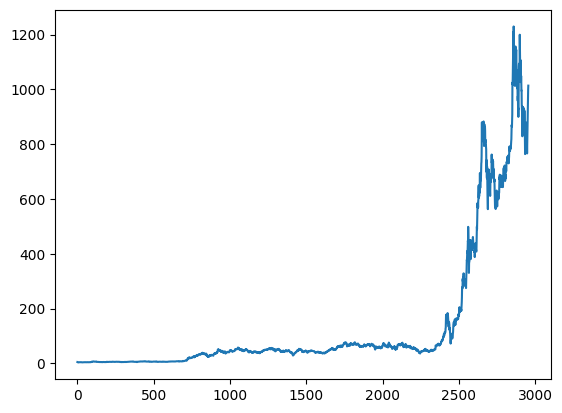

In [7]:
import matplotlib.pyplot as plt
plt.plot(df)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
df= scaler.fit_transform(np.array(df).reshape(-1,1))

In [9]:
print(df)

[[0.00131893]
 [0.00130915]
 [0.00100428]
 ...
 [0.80767879]
 [0.81186057]
 [0.82393312]]


In [10]:
training_size = int(len(df)*0.70)
test_size = len(df)-training_size
train_data, test_data = df[0:training_size, :], df[training_size: len(df), :1]

In [11]:
training_size, test_size

(2069, 887)

In [12]:
len(train_data), len(test_data)

(2069, 887)

In [13]:
def create_dataset(dataset, time_step = 1):
        dataX, dataY = [],[]
        for i in range(len(dataset) - time_step - 1):
                a = dataset[i:(i+time_step), 0]
                dataX.append(a)
                dataY.append(dataset[i+time_step, 0])
        return np.array(dataX), np.array(dataY)


In [14]:
time_step = 50
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

In [15]:
print(X_train.shape), print(Y_train.shape)

(2018, 50)
(2018,)


(None, None)

In [16]:
# reshape the X train and X test to 3 dimensional array which is required for LSTM

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [17]:
#Creating LSTM Module

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [18]:
model =Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (50, 1)))
model.add(LSTM(50, return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error', optimizer= 'adam')

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50, 50)            10400     
                                                                 
 lstm_1 (LSTM)               (None, 50, 50)            20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50851 (198.64 KB)
Trainable params: 50851 (198.64 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [20]:
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs = 100, batch_size=64, verbose=1)

Epoch 1/100
32/32 [==============================] - 7s 110ms/step - loss: 1.4883e-04 - val_loss: 0.0147
Epoch 2/100
32/32 [==============================] - 2s 57ms/step - loss: 1.0790e-05 - val_loss: 0.0065
Epoch 3/100
32/32 [==============================] - 2s 58ms/step - loss: 7.7189e-06 - val_loss: 0.0070
Epoch 4/100
32/32 [==============================] - 2s 58ms/step - loss: 7.6105e-06 - val_loss: 0.0076
Epoch 5/100
32/32 [==============================] - 2s 57ms/step - loss: 7.0291e-06 - val_loss: 0.0072
Epoch 6/100
32/32 [==============================] - 2s 58ms/step - loss: 7.0552e-06 - val_loss: 0.0059
Epoch 7/100
32/32 [==============================] - 2s 78ms/step - loss: 6.6999e-06 - val_loss: 0.0059
Epoch 8/100
32/32 [==============================] - 2s 65ms/step - loss: 6.3949e-06 - val_loss: 0.0072
Epoch 9/100
32/32 [==============================] - 2s 57ms/step - loss: 7.9914e-06 - val_loss: 0.0069
Epoch 10/100
32/32 [==============================] - 2s 56ms/s

In [21]:
# performance metrics

train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

27/27 [==============================] - 0s 12ms/step


In [22]:
#conver to original form

train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

In [23]:
# Root Mean Suare Error

import math
from sklearn.metrics import mean_squared_error
train_rmse = math.sqrt(mean_squared_error(Y_train, train_predict))
test_rmse = math.sqrt(mean_squared_error(Y_test, test_predict))
train_rmse, test_rmse

(41.521705301697544, 436.20224871501875)

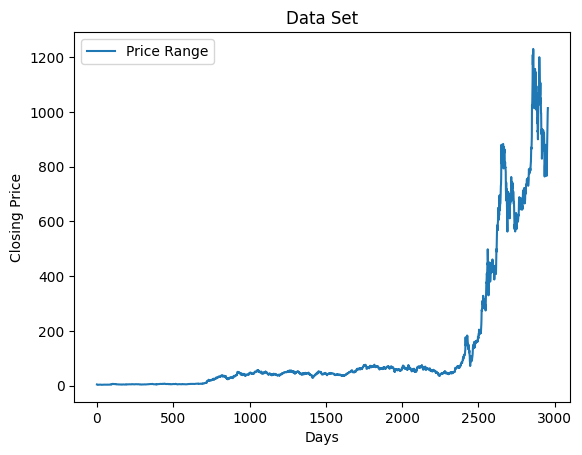

In [24]:
### Plotting
# shift train predictions for plotting
look_back=50
trainPredictPlot = np.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df),  label = 'Price Range')
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title('Data Set')
plt.legend()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

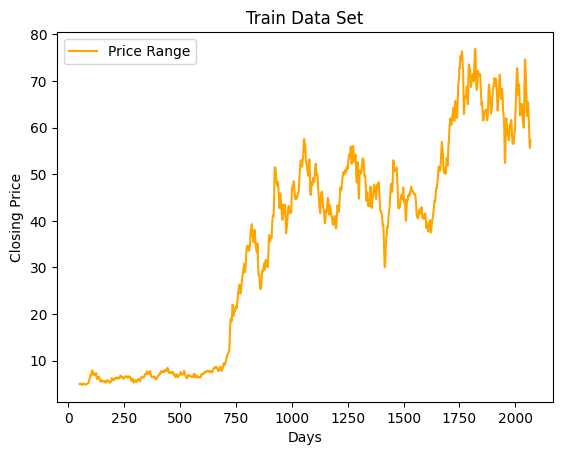

In [25]:
plt.plot(trainPredictPlot, color = 'orange', label = 'Price Range')
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title('Train Data Set')
plt.legend()
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

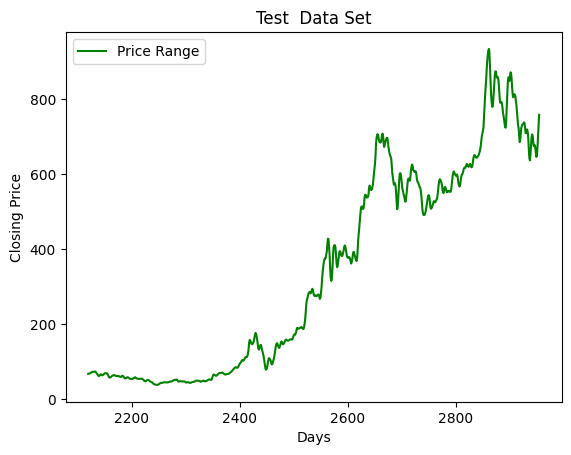

In [26]:
plt.plot(testPredictPlot, color = 'g',  label = 'Price Range')
plt.title('Test  Data Set')
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.legend()
plt.show

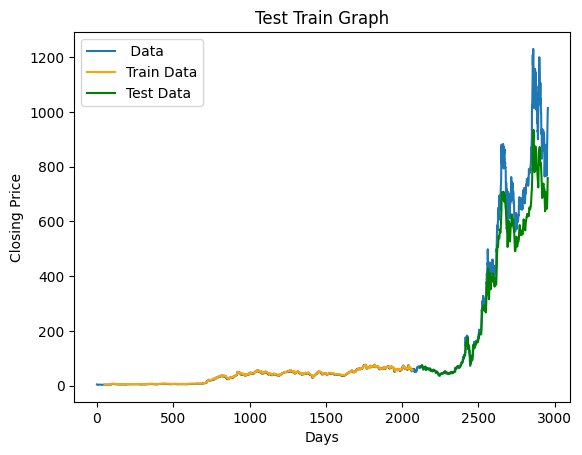

In [27]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df), label = ' Data')
plt.plot(trainPredictPlot, color = 'orange', label = 'Train Data')
plt.plot(testPredictPlot, color = 'g', label = 'Test Data')
plt.xlabel("Days")
plt.ylabel("Closing Price")
plt.title('Test Train Graph')
plt.legend()
plt.show()

When do you want to buy the stock : 300
When do you want to sell the stock (Less than 836 days) : 325
You Bought the stock at a price of  [157.61751]
your selling price is  [113.835365]
do not sell the stock


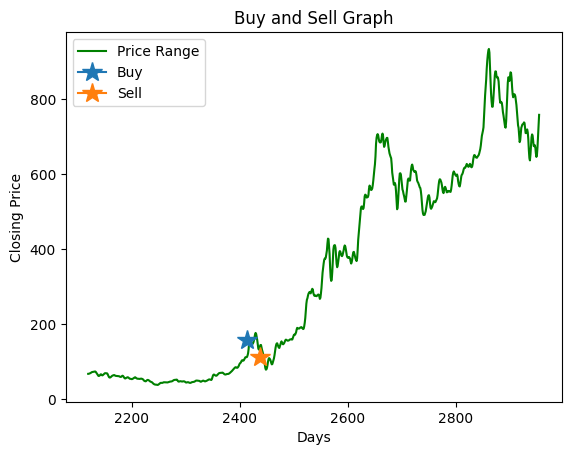

In [67]:

date1 = int(input("When do you want to buy the stock : "))
date2 = int(input("When do you want to sell the stock (Less than 836 days) : "))

if date2 > 835:
  print("enter lesser value than 886")
  date2 = int(input("When do you want to sell the stock (Less than 836 days) : "))
else:
  pass

if (date2 < date1):
  print("cannot sell preior to buying stock")
elif (date1 == date2):
  print("Hold your posiotion for some more days")
else:
  buy= test_predict[date1]
  sell = test_predict[date2]
  plt.plot(testPredictPlot, color = 'g',  label = 'Price Range')
  plt.plot((2113+date1), buy,  marker = '*', label = 'Buy', ms=15)
  plt.plot((2113+date2), sell, marker = '*', label = 'Sell', ms = 15)
  plt.xlabel("Days")
  plt.ylabel("Closing Price")
  plt.title('Buy and Sell Graph')
  plt.legend()
  plt.show
  print( "You Bought the stock at a price of ", buy )
  print("your selling price is ", sell)

  if buy > sell:
    print("do not sell the stock")
  elif buy == sell:
    print("hold your position to get profit")
  elif buy < sell:
    print("you can sell the stock")
    print(f"if you sell the stock, you will get {sell - buy} profit per stock" )
